# Data Analysis

## Imports

In [2]:
import pandas as pd
import statsmodels.api as sm

## Loading the Data

In [3]:
model_df = pd.read_csv('../data/final_data.csv')
model_df


,Price_per_m²,Online_since_in_h,WG_Size,Total_People,Size,Warm_Rent_in_€,Cold_Rent_in_€,Deposit_in_€,Roomsize in m²,Appartmentsize in m²,...,Construction_Year,Parking,Floor,Smoking,Garden_Balcony,Dist_center_in_km,Title_Length,Description_Length,Fact_Count,Population_per_km²
0,27.823529,1,2,1,17m²,473.0,393,982.0,17,55.0,...,NaN,Bewohnerparken,2,Rauchen nicht erwünscht,NaN,3.7,21,1179.0,36,11259.96
1,50.000000,1,2,1,12m²,600.0,600,900.0,12,NaN,...,NaN,NaN,0,Rauchen nicht erwünscht,Balkon,2.7,58,1443.0,31,12150.68
2,40.000000,1,2,1,20m²,800.0,800,500.0,20,84.0,...,NaN,Bewohnerparken,1,Rauchen teilweise erlaubt,Balkon,3.4,38,505.0,30,6467.99
3,29.285714,1,5,2,28m²,820.0,720,1440.0,28,NaN,...,NaN,NaN,0,NaN,Garten,5.4,25,2568.0,28,3283.34
4,41.666667,1,3,2,12m²,500.0,500,250.0,12,NaN,...,NaN,gute Parkmöglichkeiten,1,NaN,Balkon,4.0,61,1421.0,34,5048.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,16.666667,1344,2,0,60m²,1000.0,850,250.0,60,NaN,...,NaN,gute Parkmöglichkeiten,2,NaN,Balkon,3.2,31,1642.0,33,11677.08
1023,42.941176,1344,4,3,17m²,730.0,680,200.0,17,70.0,...,NaN,NaN,1,Rauchen teilweise erlaubt,NaN,2.7,36,1402.0,28,12311.83
1024,4.000000,1368,2,1,10m²,40.0,40,0.0,10,47.0,...,1964.0,gute Parkmöglichkeiten,0,Rauchen nicht erwünscht,NaN,3.6,74,766.0,35,3446.98
1025,24.347826,1368,3,2,23m²,560.0,490,NaN,23,NaN,...,NaN,NaN,2,Rauchen teilweise erlaubt,Balkon,3.4,55,641.0,24,7241.29


# Removing non cologn appartments

In [7]:
model_df = model_df.dropna(subset=['left_rhine_side'])

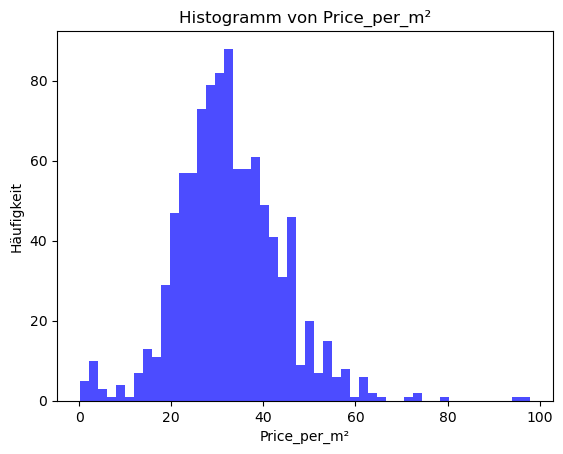

In [41]:
import matplotlib.pyplot as plt

# Erstellen des Histogramms
plt.hist(model_df['Price_per_m²'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histogramm von Price_per_m²')
plt.xlabel('Price_per_m²')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

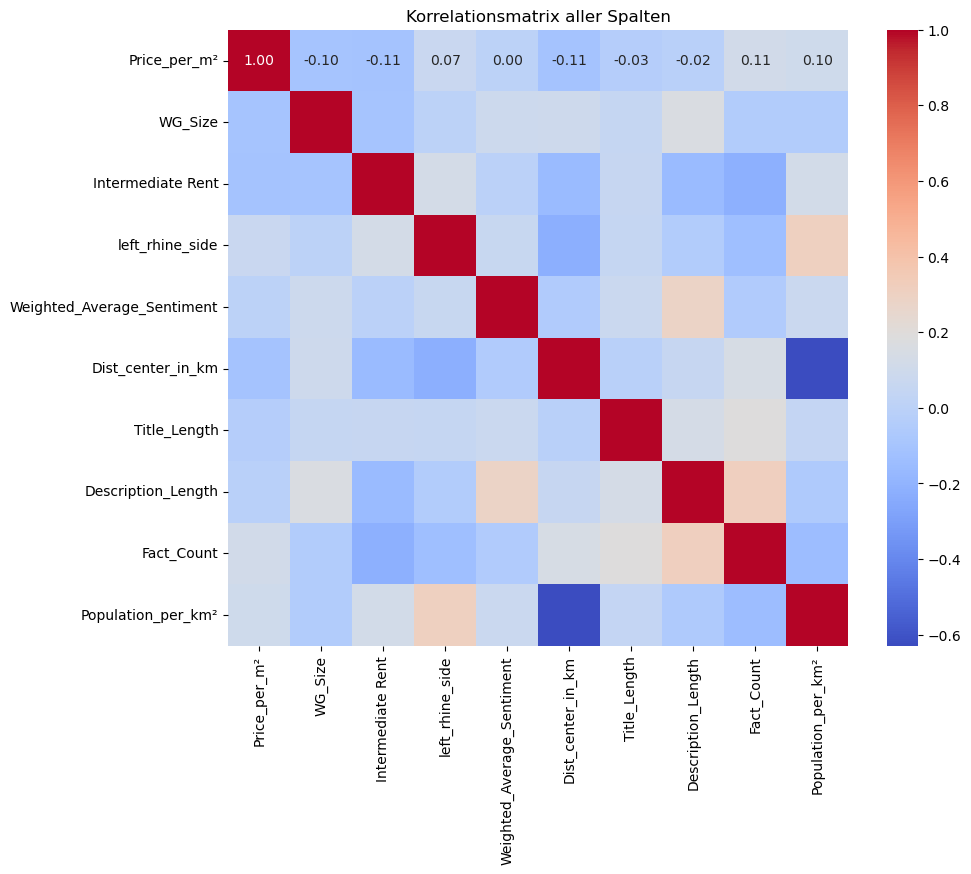

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Berechnung der Korrelationsmatrix
corr_matrix = large_df.corr()

# Erstellung einer Heatmap für die Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korrelationsmatrix aller Spalten')
plt.show()

#  Regression on largest possible Dataset

In [43]:
large_df = model_df.dropna(axis=1)
large_df = large_df.drop(['Warm_Rent_in_€', 'Cold_Rent_in_€', 'Roomsize in m²', 'Size'], axis=1) # droping, because they are related to the target variable
large_df = large_df.drop(['Total_People'], axis=1)      # droping, because it is related to Wg_size
large_df = large_df.drop(['Online_since_in_h'], axis=1) # droping, because it is not relvant for the target variable
large_df = large_df.astype(float)
X = large_df.drop('Price_per_m²', axis=1)
y = large_df['Price_per_m²']
X = sm.add_constant(X)

large_model = sm.OLS(y, X).fit()
large_summary = large_model.summary()
print(large_df.columns)
print(large_summary)

# eventuell muss linke rheinseite noch entfernt werden, weil es correlated ist mit der der distance



Index(['Price_per_m²', 'WG_Size', 'Intermediate Rent', 'left_rhine_side',
       'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Title_Length',
       'Description_Length', 'Fact_Count', 'Population_per_km²'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     6.981
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           8.15e-10
Time:                        20:13:20   Log-Likelihood:                -3783.2
No. Observations:                 992   AIC:                             7586.
Df Residuals:                     982   BIC:                             7635.
Df Model:                           9                                         
Covariance Type:            nonrobust                

# Regression with Balcony-Subset
 Gedanke: Balkon und Terasse werden immer angegeben, wenn sie vorhanden sind

In [36]:
starting_point_df = model_df[['Price_per_m²', 'WG_Size', 'Intermediate Rent', 'left_rhine_side',
       'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Title_Length',
       'Description_Length', 'Fact_Count', 'Population_per_km²']]

balcony_df = starting_point_df.copy()
balcony_df['Garden_Balcony'] = model_df['Garden_Balcony'].notna().astype(int)
balcony_df

,Price_per_m²,WG_Size,Intermediate Rent,left_rhine_side,Weighted_Average_Sentiment,Dist_center_in_km,Title_Length,Description_Length,Fact_Count,Population_per_km²,Garden_Balcony
0,27.823529,2,True,1.0,0.828058,3.7,21,1179.0,36,11259.96,0
1,50.000000,2,True,1.0,0.993400,2.7,58,1443.0,31,12150.68,1
2,40.000000,2,True,1.0,0.599400,3.4,38,505.0,30,6467.99,1
3,29.285714,5,False,1.0,0.945505,5.4,25,2568.0,28,3283.34,1
4,41.666667,3,True,1.0,0.803016,4.0,61,1421.0,34,5048.95,1
...,...,...,...,...,...,...,...,...,...,...,...
1022,16.666667,2,True,1.0,0.856763,3.2,31,1642.0,33,11677.08,1
1023,42.941176,4,True,1.0,0.963600,2.7,36,1402.0,28,12311.83,0
1024,4.000000,2,True,0.0,0.951300,3.6,74,766.0,35,3446.98,0
1025,24.347826,3,True,1.0,0.980600,3.4,55,641.0,24,7241.29,1


In [40]:
balcony_df = balcony_df.astype(float)
X = balcony_df.drop('Price_per_m²', axis=1)
y = balcony_df['Price_per_m²']
X = sm.add_constant(X)

large_model = sm.OLS(y, X).fit()
large_summary = large_model.summary()
print(large_df.columns)
print(large_summary)

Index(['Price_per_m²', 'WG_Size', 'Intermediate Rent', 'left_rhine_side',
       'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Title_Length',
       'Description_Length', 'Fact_Count', 'Population_per_km²',
       'Garden_Balcony'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     6.298
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           2.07e-09
Time:                        20:10:42   Log-Likelihood:                -3783.1
No. Observations:                 992   AIC:                             7588.
Df Residuals:                     981   BIC:                             7642.
Df Model:                          10                                         
Covariance Type:            

# Test Area

## New

In [48]:
test = model_df.dropna(axis=1)
test = test.drop([ 'Cold_Rent_in_€', 'Size'], axis=1) # droping, because they are related to 'Warm_Rent_in_€' or 'Roomsize in m²'
test = test.drop(['Total_People'], axis=1)      # droping, because it is related to Wg_size
test = test.drop(['Price_per_m²'], axis=1) # droping, because it is not relvant for the target variable
test = test.astype(float)
X = test.drop('Online_since_in_h', axis=1)
y = test['Online_since_in_h']
X = sm.add_constant(X)

large_model = sm.OLS(y, X).fit()
large_summary = large_model.summary()
print(large_df.columns)
print(large_summary)

Index(['Price_per_m²', 'WG_Size', 'Intermediate Rent', 'left_rhine_side',
       'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Title_Length',
       'Description_Length', 'Fact_Count', 'Population_per_km²'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:      Online_since_in_h   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.881
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           0.000974
Time:                        20:23:34   Log-Likelihood:                -6983.9
No. Observations:                 992   AIC:                         1.399e+04
Df Residuals:                     980   BIC:                         1.405e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                

## Old 

In [8]:

import pandas as pd
import numpy as np

# Assuming `df` is your DataFrame
print(test.isnull().sum())  # To check for NaNs
print(test.isin([np.inf, -np.inf]).sum())  # To check for infs

# Assuming `df` is your DataFrame
print(test.isnull().sum())  # To check for NaNs
print(test.isin([np.inf, -np.inf]).sum())  # To check for infs

Price_per_m²                  245
left_rhine_side                35
Weighted_Average_Sentiment      0
Dist_center_in_km               0
dtype: int64
Price_per_m²                  0
left_rhine_side               0
Weighted_Average_Sentiment    0
Dist_center_in_km             0
dtype: int64
Price_per_m²                  245
left_rhine_side                35
Weighted_Average_Sentiment      0
Dist_center_in_km               0
dtype: int64
Price_per_m²                  0
left_rhine_side               0
Weighted_Average_Sentiment    0
Dist_center_in_km             0
dtype: int64


In [10]:
nan_rows = test[test.isna().any(axis=1)]
print(nan_rows)

      Price_per_m²  left_rhine_side  Weighted_Average_Sentiment  \
1              NaN              1.0                    0.993400   
4              NaN              1.0                    0.803016   
15             NaN              1.0                    0.745780   
20             NaN              1.0                    0.935700   
23             NaN              1.0                    0.553160   
...            ...              ...                         ...   
1002           NaN              0.0                    0.939090   
1004           NaN              1.0                    0.848965   
1007     36.875000              NaN                    0.877700   
1009           NaN              1.0                    0.906194   
1015     20.483871              NaN                    0.823592   

      Dist_center_in_km  
1                   2.7  
4                   4.0  
15                  1.0  
20                  4.1  
23                  5.0  
...                 ...  
1002         

In [17]:
model_df

,Price_per_m²,Online_since_in_h,WG_Size,Total_People,Size,Warm_Rent_in_€,Cold_Rent_in_€,Deposit_in_€,Roomsize in m²,Appartmentsize in m²,...,left_rhine_side,Weighted_Average_Sentiment,Min Age,Max Age,Construction_Year,Parking,Floor,Smoking,Garden_Balcony,Dist_center_in_km
0,27.823529,1,2,1,17m²,473.0,393,982.0,17,55.0,...,1.0,0.828025,20.0,30.0,NaN,Bewohnerparken,2,Rauchen nicht erwünscht,NaN,3.7
1,NaN,1,2,1,12m²,NaN,600,900.0,12,NaN,...,1.0,0.993400,30.0,30.0,NaN,NaN,0,Rauchen nicht erwünscht,Balkon,2.7
2,40.000000,1,2,1,20m²,800.0,800,500.0,20,84.0,...,1.0,0.599400,20.0,30.0,NaN,Bewohnerparken,1,Rauchen teilweise erlaubt,Balkon,3.4
3,29.285714,1,5,2,28m²,820.0,720,1440.0,28,NaN,...,1.0,0.945424,25.0,35.0,NaN,NaN,0,NaN,Garten,5.4
4,NaN,1,3,2,12m²,NaN,500,250.0,12,NaN,...,1.0,0.803016,25.0,25.0,NaN,gute Parkmöglichkeiten,1,NaN,Balkon,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,16.666667,1344,2,0,60m²,1000.0,850,250.0,60,NaN,...,1.0,0.856763,NaN,NaN,NaN,gute Parkmöglichkeiten,2,NaN,Balkon,3.2
1023,42.941176,1344,4,3,17m²,730.0,680,200.0,17,70.0,...,1.0,0.963600,20.0,27.0,NaN,NaN,1,Rauchen teilweise erlaubt,NaN,2.7
1024,4.000000,1368,2,1,10m²,40.0,40,0.0,10,47.0,...,0.0,0.951300,18.0,99.0,1964.0,gute Parkmöglichkeiten,0,Rauchen nicht erwünscht,NaN,3.6
1025,24.347826,1368,3,2,23m²,560.0,490,NaN,23,NaN,...,1.0,0.980600,21.0,23.0,NaN,NaN,2,Rauchen teilweise erlaubt,Balkon,3.4


In [19]:
test2 = model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']].dropna()
X = test2[['left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']]
y = test2['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     17.22
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           5.35e-16
Time:                        10:53:07   Log-Likelihood:                -2431.2
No. Observations:                 643   AIC:                             4874.
Df Residuals:                     637   BIC:                             4901.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [24]:
test2

,Price_per_m²,left_rhine_side,Weighted_Average_Sentiment,Dist_center_in_km,Deposit_in_€,WG_Size
0,27.823529,1.0,0.828025,3.7,982.0,2
2,40.000000,1.0,0.599400,3.4,500.0,2
3,29.285714,1.0,0.945424,5.4,1440.0,5
5,25.000000,1.0,0.977700,4.6,1200.0,2
6,46.600000,1.0,0.631415,3.7,250.0,2
...,...,...,...,...,...,...
1021,35.714286,0.0,0.722276,3.0,1000.0,2
1022,16.666667,1.0,0.856763,3.2,250.0,2
1023,42.941176,1.0,0.963600,2.7,200.0,4
1024,4.000000,0.0,0.951300,3.6,0.0,2


In [23]:
test_left= model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']].dropna()
test_left = test_left[test_left['left_rhine_side'] == 1]
X = test_left[['Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']]
y = test_left['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     19.19
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.13e-14
Time:                        10:57:43   Log-Likelihood:                -1885.1
No. Observations:                 494   AIC:                             3780.
Df Residuals:                     489   BIC:                             3801.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [22]:
test_right= model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']].dropna()
test_right = test_right[test_right['left_rhine_side'] == 0]
X = test_right[['Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']]
y = test_right['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.775
Date:                Thu, 11 Jul 2024   Prob (F-statistic):              0.137
Time:                        10:57:21   Log-Likelihood:                -539.66
No. Observations:                 149   AIC:                             1089.
Df Residuals:                     144   BIC:                             1104.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
x



# Dropping rows with any missing values in these columns
df3 = final_df.dropna()
numeric_columns = ['Deposit', 'Roomsize in m²', 'Appartmentsize in m²', 'Flatmate count', 'Postal Code', 'Floor', 'Online since in h', 'Min Age', 'Max Age', 'Intermediate Rent']
for col in numeric_columns:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')

# Dropping rows with any missing values (after conversion, as conversion might introduce NaNs)
df3 = df3.dropna()
df3['Intermediate Rent'] = df3['Intermediate Rent'].astype(int)

x = df3[['Deposit', 'Roomsize in m²', 'Appartmentsize in m²', 'Flatmate count', 'Postal Code', 'Floor', 'Online since in h', 'Min Age', 'Max Age',  'Intermediate Rent']]
x = sm.add_constant(x)
y = df3['Rent incl. Extra in €']
print(y.max())


# Adding a constant (intercept) to the model
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
summary = model.summary()
print(summary)

# 2nd Try

In [32]:
model_df = pd.read_csv('../data/final_data.csv')
filled = pd.read_csv('../data/test_data.csv')

model_df['Price_per_m²'] = model_df['Price_per_m²'].fillna(filled['Price_per_m²'])
model_df['Deposit_in_€'] = model_df['Deposit_in_€'].fillna(0)

test2 = model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']].dropna()
X = test2[['left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']]
y = test2['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)



                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     22.88
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           8.90e-22
Time:                        11:16:04   Log-Likelihood:                -3759.6
No. Observations:                 992   AIC:                             7531.
Df Residuals:                     986   BIC:                             7561.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [33]:
test_left= model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']].dropna()
test_left = test_left[test_left['left_rhine_side'] == 1]
X = test_left[['Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']]
y = test_left['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     24.41
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           4.83e-19
Time:                        11:17:01   Log-Likelihood:                -2961.3
No. Observations:                 773   AIC:                             5933.
Df Residuals:                     768   BIC:                             5956.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [34]:
test_right= model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']].dropna()
test_right = test_right[test_right['left_rhine_side'] == 0]
X = test_right[['Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size']]
y = test_right['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     3.722
Date:                Thu, 11 Jul 2024   Prob (F-statistic):            0.00596
Time:                        11:17:27   Log-Likelihood:                -785.62
No. Observations:                 219   AIC:                             1581.
Df Residuals:                     214   BIC:                             1598.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [36]:
nan_rows_specific_column = model_df[model_df['Price_per_m²'].isna()]
nan_rows_specific_column

print(model_df.isnull().sum())  # To check for NaNs

Price_per_m²                    0
Online_since_in_h               0
WG_Size                         0
Total_People                    0
Size                            0
Warm_Rent_in_€                245
Cold_Rent_in_€                  0
Deposit_in_€                    0
Roomsize in m²                  0
Appartmentsize in m²          271
Intermediate Rent               0
Population per km²             35
left_rhine_side                35
Weighted_Average_Sentiment      0
Min Age                       131
Max Age                       131
Construction_Year             951
Parking                       397
Floor                         145
Smoking                       306
Garden_Balcony                446
Dist_center_in_km               0
dtype: int64


# 3rd Try

In [72]:
model_df = pd.read_csv('../data/final_data.csv')
filled = pd.read_csv('../data/test_data.csv')

model_df['Price_per_m²'] = model_df['Price_per_m²'].fillna(filled['Price_per_m²'])
model_df['Deposit_in_€'] = model_df['Deposit_in_€'].fillna(0)

test3 = model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size', 'Garden_Balcony','Smoking', 'Parking','Floor']].dropna()

# Convert 'Floor' to numeric, coercing errors to NaN
test3['Floor'] = pd.to_numeric(test3['Floor'], errors='coerce')

# Drop rows where 'Floor' is now NaN (i.e., conversion was not possible)
test3.dropna(subset=['Floor'], inplace=True)

z = pd.get_dummies(test3, columns=['Smoking', 'Garden_Balcony', 'Parking'], drop_first=True).astype(float)
z = z.drop(columns='Price_per_m²')
X = z
y = test3['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.441
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.51e-07
Time:                        11:44:36   Log-Likelihood:                -1169.7
No. Observations:                 307   AIC:                             2371.
Df Residuals:                     291   BIC:                             2431.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [70]:
z = pd.get_dummies(test3, columns=['Smoking', 'Garden_Balcony', 'Parking'], drop_first=True).astype(int)
z = z.drop(columns='Price_per_m²')
print(z)

      left_rhine_side  Weighted_Average_Sentiment  Dist_center_in_km  \
2                   1                           0                  3   
8                   1                           0                  3   
9                   1                           0                  2   
10                  1                           0                  2   
25                  1                           0                  3   
...               ...                         ...                ...   
1012                1                           0                  1   
1013                0                           0                  8   
1017                0                           0                  8   
1019                1                           0                  2   
1021                0                           0                  3   

      Deposit_in_€  WG_Size  Floor  Smoking_Rauchen teilweise erlaubt  \
2              500        2      1                            

# 4th Try
Smoking spalte entfernt

In [73]:
model_df = pd.read_csv('../data/final_data.csv')
filled = pd.read_csv('../data/test_data.csv')

model_df['Price_per_m²'] = model_df['Price_per_m²'].fillna(filled['Price_per_m²'])
model_df['Deposit_in_€'] = model_df['Deposit_in_€'].fillna(0)

test3 = model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size', 'Garden_Balcony', 'Parking','Floor']].dropna()

# Convert 'Floor' to numeric, coercing errors to NaN
test3['Floor'] = pd.to_numeric(test3['Floor'], errors='coerce')

# Drop rows where 'Floor' is now NaN (i.e., conversion was not possible)
test3.dropna(subset=['Floor'], inplace=True)

z = pd.get_dummies(test3, columns=[ 'Garden_Balcony', 'Parking'], drop_first=True).astype(float)
z = z.drop(columns='Price_per_m²')
X = z
y = test3['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     5.985
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           4.73e-10
Time:                        11:45:58   Log-Likelihood:                -1350.4
No. Observations:                 358   AIC:                             2729.
Df Residuals:                     344   BIC:                             2783.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

# 5th Try (Reducing complexity of Balcony/Garden)

In [76]:
model_df = pd.read_csv('../data/final_data.csv')
filled = pd.read_csv('../data/test_data.csv')

model_df['Price_per_m²'] = model_df['Price_per_m²'].fillna(filled['Price_per_m²'])
model_df['Deposit_in_€'] = model_df['Deposit_in_€'].fillna(0)

model_df['Garden_Balcony'] = model_df['Garden_Balcony'].notna().astype(int)

test3 = model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size', 'Garden_Balcony', 'Parking','Floor']].dropna()

# Convert 'Floor' to numeric, coercing errors to NaN
test3['Floor'] = pd.to_numeric(test3['Floor'], errors='coerce')

# Drop rows where 'Floor' is now NaN (i.e., conversion was not possible)
test3.dropna(subset=['Floor'], inplace=True)

z = pd.get_dummies(test3, columns=[ 'Parking'], drop_first=True).astype(float)
z = z.drop(columns='Price_per_m²')
X = z
y = test3['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     7.235
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.44e-11
Time:                        11:58:31   Log-Likelihood:                -2092.4
No. Observations:                 555   AIC:                             4209.
Df Residuals:                     543   BIC:                             4261.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

# 6th Try (Removing Floor and Parking) 

In [78]:
model_df = pd.read_csv('../data/final_data.csv')
filled = pd.read_csv('../data/test_data.csv')

model_df['Price_per_m²'] = model_df['Price_per_m²'].fillna(filled['Price_per_m²'])
model_df['Deposit_in_€'] = model_df['Deposit_in_€'].fillna(0)

model_df['Garden_Balcony'] = model_df['Garden_Balcony'].notna().astype(int)

test3 = model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size', 'Garden_Balcony']].dropna()


z = test3.drop(columns='Price_per_m²')
X = z
y = test3['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     19.17
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           3.30e-21
Time:                        12:02:21   Log-Likelihood:                -3759.2
No. Observations:                 992   AIC:                             7532.
Df Residuals:                     985   BIC:                             7567.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [87]:
model_df = pd.read_csv('../data/final_data.csv')
filled = pd.read_csv('../data/test_data.csv')

model_df['Price_per_m²'] = model_df['Price_per_m²'].fillna(filled['Price_per_m²'])
model_df['Deposit_in_€'] = model_df['Deposit_in_€'].fillna(0)

model_df['Garden_Balcony'] = model_df['Garden_Balcony'].notna().astype(int)
left = model_df[model_df['left_rhine_side'] == 1]
test3 = left[['Price_per_m²',  'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size', 'Garden_Balcony']].dropna()


z = test3.drop(columns='Price_per_m²')
X = z
y = test3['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     19.63
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.97e-18
Time:                        12:24:48   Log-Likelihood:                -2961.0
No. Observations:                 773   AIC:                             5934.
Df Residuals:                     767   BIC:                             5962.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [88]:
model_df = pd.read_csv('../data/final_data.csv')
filled = pd.read_csv('../data/test_data.csv')

model_df['Price_per_m²'] = model_df['Price_per_m²'].fillna(filled['Price_per_m²'])
model_df['Deposit_in_€'] = model_df['Deposit_in_€'].fillna(0)

model_df['Garden_Balcony'] = model_df['Garden_Balcony'].notna().astype(int)
right = model_df[model_df['left_rhine_side'] == 0]
test3 = left[['Price_per_m²', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size', 'Garden_Balcony']].dropna()


z = test3.drop(columns='Price_per_m²')
X = z
y = test3['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     19.63
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.97e-18
Time:                        12:24:56   Log-Likelihood:                -2961.0
No. Observations:                 773   AIC:                             5934.
Df Residuals:                     767   BIC:                             5962.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# 7th try (Reducing Complexity of Parking)
Starting Point -> 5

In [89]:
model_df = pd.read_csv('../data/final_data.csv')
filled = pd.read_csv('../data/test_data.csv')

model_df['Price_per_m²'] = model_df['Price_per_m²'].fillna(filled['Price_per_m²'])
model_df['Deposit_in_€'] = model_df['Deposit_in_€'].fillna(0)

model_df['Garden_Balcony'] = model_df['Garden_Balcony'].notna().astype(int)

test3 = model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size', 'Garden_Balcony', 'Parking','Floor']].dropna()

test3['Parking'] = test3['Parking'].replace('schlechte Parkmöglichkeiten', np.nan)
test3['Parking'] = test3['Parking'].notna().astype(int)

# Convert 'Floor' to numeric, coercing errors to NaN
test3['Floor'] = pd.to_numeric(test3['Floor'], errors='coerce')

# Drop rows where 'Floor' is now NaN (i.e., conversion was not possible)
test3.dropna(subset=['Floor'], inplace=True)

z = test3
z = z.drop(columns='Price_per_m²')
X = z
y = test3['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     9.458
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           2.78e-12
Time:                        12:25:28   Log-Likelihood:                -2094.4
No. Observations:                 555   AIC:                             4207.
Df Residuals:                     546   BIC:                             4246.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# 8 (falscher Ansatz, da zunächst Zeilen basierend auf Spalten entfernt werden, die später nicht mehr genutzt werden) 

In [90]:
model_df = pd.read_csv('../data/final_data.csv')
filled = pd.read_csv('../data/test_data.csv')

model_df['Price_per_m²'] = model_df['Price_per_m²'].fillna(filled['Price_per_m²'])
model_df['Deposit_in_€'] = model_df['Deposit_in_€'].fillna(0)

model_df['Garden_Balcony'] = model_df['Garden_Balcony'].notna().astype(int)

test4 = model_df[['Price_per_m²', 'left_rhine_side', 'Weighted_Average_Sentiment', 'Dist_center_in_km', 'Deposit_in_€', 'WG_Size', 'Garden_Balcony', 'Parking','Floor']].dropna()

test4['Parking'] = test4['Parking'].replace('schlechte Parkmöglichkeiten', np.nan)
test4['Parking'] = test4['Parking'].notna().astype(int)

# Convert 'Floor' to numeric, coercing errors to NaN
test4['Floor'] = pd.to_numeric(test4['Floor'], errors='coerce')

# Drop rows where 'Floor' is now NaN (i.e., conversion was not possible)
test4.dropna(subset=['Floor'], inplace=True)

test4.drop(columns=['Floor', 'Parking'], inplace=True)   

z = test4
z = z.drop(columns='Price_per_m²')
X = z
y = test4['Price_per_m²']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     12.52
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           2.99e-13
Time:                        12:28:08   Log-Likelihood:                -2094.7
No. Observations:                 555   AIC:                             4203.
Df Residuals:                     548   BIC:                             4234.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               